A supermarket chain wants to get business insights from a dataset, the dataset contain the invoice details of the type of product that was bought by each customer, and from which branch, the rating that each customer gave to their overall experience, tax, cost of the goods sold, and the profit and other data.

In [6]:
#importing pandas
import pandas as pd

In [7]:
#loading the dataset

df = pd.read_csv("supermarket_sales - Sheet1.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [8]:
# How many rows and columns the dataset have.
df.shape

(1000, 17)

The questions that i will answer here to get insights:

1)what is the gross income of the product line/type that have the lowest rating?

2)which city/branch make the most earnings?

3)which gender give the worst ratings? and what do they buy the most?

4)Do members spends more than normal customers? how much more? and are their rating better than the rating of normal customers?

5)in which city does consumers give higher ratings?

6) what are the COGS of each product line? and are the product lines with higher costs also have higher profits? and what are the quantities that product line sell?

7)Are there any specific times in the day, where sales are more or less than usual?

Data preprocessing

In [9]:
#Here i will delete the payment method and invoice id columns, as there no need for them to answer the busieness questions
df = df.drop(['Payment', 'Invoice ID'], axis=1)
#And i will check if they were actually removed.
print(df.shape)

(1000, 15)


In [10]:
# Here i will check if any missing values exist in the dataset
None_values = df.isnull().sum()
None_values

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Lookin in data types and check for weird values in columns

In [11]:
# here i will check for the type of the data in each column
# as it can help me after some codes later
df.dtypes

Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [12]:
# Here i will count the frequency of the values in the columns that i will use to answer the business questions
# it's possible to find cells with wrong/weird/not suitable data in a column this way
df["Branch"].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [13]:
df["City"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [14]:
# Here i see that City and Branch data have similiar counts
# but to make sure it's the same thing, i will write this code
# if every branch have similar count with a city, then we can only use one of them in later codes
df.value_counts(["City", "Branch"])

City       Branch
Yangon     A         340
Mandalay   B         332
Naypyitaw  C         328
dtype: int64

In [15]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [16]:
df["Gender"].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [17]:
# here i see that the number of males are the same as number of customers who are normal
# and number of females are the same as number of customers who are member
# with a quick look at the dataset and the columns i can see that it's a concidence
# but to make sure, i will write this code to see that not all females are members
# and not all males are normal customer
df.value_counts(["Gender", "Customer type"])

Gender  Customer type
Female  Member           261
Male    Normal           259
Female  Normal           240
Male    Member           240
dtype: int64

In [18]:
df["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [20]:
df["Quantity"].value_counts()

10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

In [21]:
df["cogs"].value_counts()

206.52    2
89.28     2
83.08     2
180.09    2
448.56    2
         ..
144.27    1
391.79    1
538.30    1
485.15    1
618.38    1
Name: cogs, Length: 990, dtype: int64

In [22]:
# since i couldn't see the exact count of each value in cogs column
# Here i will see if there is no non numeric data in the cogs column
# i used a code that will count the float data and then give the sum of all the counts
cogsfloat = df["gross income"].loc[df["gross income"].apply(lambda x: isinstance(x, float))].value_counts()
cogsfloat_count = cogsfloat.sum()

print(cogsfloat_count)
# number of the rows is 1000, so if the result is 1000, then that means all cells are float

1000


In [23]:
df["gross income"].value_counts()

10.3260    2
4.4640     2
4.1540     2
9.0045     2
22.4280    2
          ..
7.2135     1
19.5895    1
26.9150    1
24.2575    1
30.9190    1
Name: gross income, Length: 990, dtype: int64

In [24]:
# since i couldn't see the exact count of each value in gross income column
# Here i will see if there is no non numeric data in the gross income column
# i used a code that will count the float data and then give the sum of all the counts
grossincomefloat = df["gross income"].loc[df["gross income"].apply(lambda x: isinstance(x, float))].value_counts()
grossincomefloat_count = grossincomefloat.sum()

print(grossincomefloat_count)
# number of the rows is 1000, so if the result is 1000, then that means all cells are float

1000


In [25]:
df["Rating"].value_counts()

6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: Rating, Length: 61, dtype: int64

In [26]:
# since i couldn't see the exact count of each value in Rating column
# Here i will see if there is no non numeric data in the Ratinge column
# i used a code that will count the float data and then give the sum of all the counts
ratingfloat = df["Rating"].loc[df["Rating"].apply(lambda x: isinstance(x, float))].value_counts()
ratingfloat_count = ratingfloat.sum()

print(ratingfloat_count)
# like previous code, number of the rows is 1000, so if the result is 1000, then that means all cells are float

1000


In [42]:
df["Time"].value_counts()

19:48    7
14:42    7
17:38    6
17:16    5
11:40    5
        ..
13:26    1
11:17    1
14:57    1
17:53    1
19:12    1
Name: Time, Length: 506, dtype: int64

In [43]:
# since i couldn't see the exact count of each value in Time column
# Here i will see if there is no time data in it
# first i will convert the data in the time column to time data
df['Time'] = pd.to_datetime(df['Time'])

In [45]:
# here i will check if the tyoe of time column time changed
df.dtypes

Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                               object
Time                       datetime64[ns]
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [46]:
# Here i will see if there is non no time data in it
# i used a code that will count the Time data and then give the sum of all the counts
Timedata = df["Time"].loc[df["Time"].apply(lambda x: isinstance(x, pd.Timestamp))].value_counts()
Timedata_count = Timedata.sum()

print(Timedata_count)
# like previous code, number of the rows is 1000, so if the result is 1000, then that means all cells are time type data

1000


Answering the quesitons

First question: what is the gross income of the product line/type that have the lowest rating?

In [27]:
# here i will search for the average rating for each product line and sort the result
Rate_product = df.groupby('Product line')['Rating'].mean()
Rate_product_sort = Rate_product.sort_values()
Rate_product_sort

Product line
Home and lifestyle        6.837500
Sports and travel         6.916265
Electronic accessories    6.924706
Health and beauty         7.003289
Fashion accessories       7.029213
Food and beverages        7.113218
Name: Rating, dtype: float64

In [28]:
# here i search for the average gross income for each product line and then sort them
productline_profit =df.groupby('Product line')['gross income'].mean()
productline_profit_sort = productline_profit.sort_values()
productline_profit_sort

Product line
Fashion accessories       14.528062
Electronic accessories    15.220597
Food and beverages        15.365310
Health and beauty         15.411572
Sports and travel         15.812630
Home and lifestyle        16.030331
Name: gross income, dtype: float64

In [29]:
# as we saw in the previous codes, the 2 product types that are rated the lowest, also have make the most profit on average
#i will check the count for each product type
df["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

Question 1 Result:

As we can see from the result of the previous codes, the lowest rated product lines also make more profit than other product lines, and they are not being bought the most or less.

So selling the same sorts for customers will not cause any losses, but the supermarket should consider if there is any issues causing this lower rating.

Second question:
which city/branch make the most earnings?

In [30]:
# here i will group the city and gross income columns and get the average profit for each city
Average_income_City = df.groupby('City')['gross income'].mean()
Average_income_City_sort = Average_income_City.sort_values()
Average_income_City_sort

City
Yangon       14.874001
Mandalay     15.232024
Naypyitaw    16.052367
Name: gross income, dtype: float64

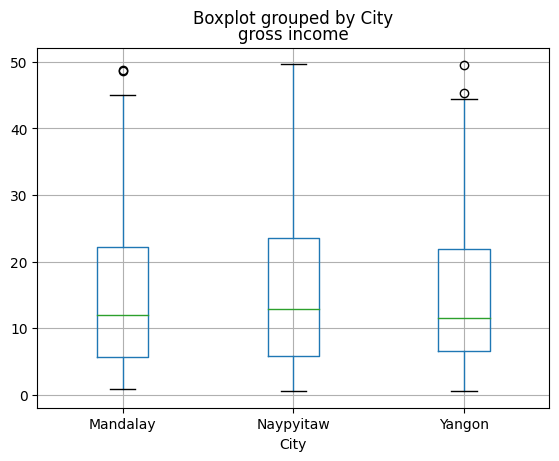

In [31]:
# here i can also visualize the results
import matplotlib.pyplot as plt
df.boxplot(column=['gross income'], by='City')
plt.show()

Question 2 results:
the branch in City Yangon make the lowest profit, and branch in Naypyitaw make the most,to get more insights, we can in future data gatherinng include the costs the supermarkets inccured invesitng in each city and the population of each city to check for the reasons of why the cities have different profits 

Question 3:which gender give the worst ratings? and what do they buy the most?

In [32]:
#here i will group the gender and rating columns and get the average rating for the genders
gender_rating_mean = df.groupby('Gender')['Rating'].mean()
gender_rating_mean_sort = gender_rating_mean.sort_values()
gender_rating_mean_sort

Gender
Female    6.964471
Male      6.980962
Name: Rating, dtype: float64

In [33]:
#now i will check the type of products each buy and how much
gender_boughtproducts_count = df.groupby('Gender')['Product line'].value_counts()
gender_boughtproducts_count

Gender  Product line          
Female  Fashion accessories       96
        Food and beverages        90
        Sports and travel         88
        Electronic accessories    84
        Home and lifestyle        79
        Health and beauty         64
Male    Health and beauty         88
        Electronic accessories    86
        Food and beverages        84
        Fashion accessories       82
        Home and lifestyle        81
        Sports and travel         78
Name: Product line, dtype: int64

Question 3 results:
the female gender gives slightly worse ratings even when their most 2 purchased products are the ones that have higher general rating.

the weaker rating might be because of reasones related to the shopping experience

Question 4: Do members spends money more than normal customers? how much more? and are their rating better than the rating of normal customers?

In [34]:
# Here i will count the number of membership customers and normal ones
memberscount = df[df['Customer type'] == 'Member'].count()[0]
normalcustomerscount = df[df['Customer type'] == 'Normal'].count()[0]

print("member customers:", memberscount)
print("normal customers:", normalcustomerscount)

member customers: 501
normal customers: 499


In [35]:
# here i will look into the average profits that the supermaket reach for each customer type
Avg_profit_members = df[df['Customer type'] == 'Member']['gross income'].mean()
Avg_profit_normal = df[df['Customer type'] == 'Normal']['gross income'].mean()

print("Average income from members:", Avg_profit_members)
print("Average income from normal customers:", Avg_profit_normal)

Average income from members: 15.609109780439123
Average income from normal customers: 15.148707414829659


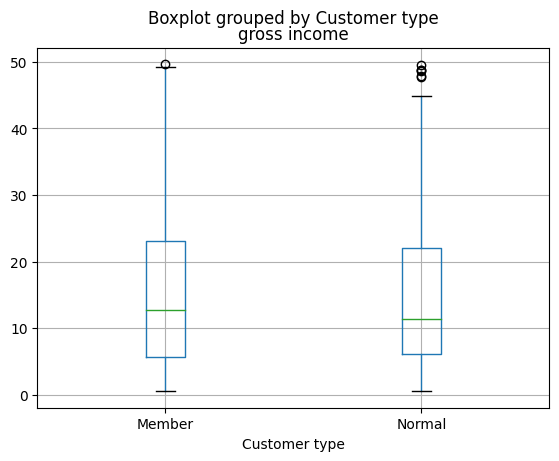

In [36]:
# here i can also visualize the results
import matplotlib.pyplot as plt
df.boxplot(column=['gross income'], by='Customer type')
plt.show()

In [37]:
# here i will look into the average ratings that the supermaket get from each customer type
rate_members = df[df['Customer type'] == 'Member']['Rating'].mean()
rate_normal = df[df['Customer type'] == 'Normal']['Rating'].mean()

print("Average rating of members:", rate_members)
print("Average rating of normal customers:", rate_normal)

Average rating of members: 6.940319361277445
Average rating of normal customers: 7.005210420841683


Results of question 4:
Here i saw the numbers of both types of customers are only different by 2, which isn't a number that have a siginificant effect on the results.

i also saw that membership customers are contributing more to the gross income than regular customers but not by a lot.

But the ratings they give is little bit weaker.

the supermakets can check that the membership programs that it's offering to people are making them still loyal (they are contributing more to the gross income).

since the average rating for both customer types  is almost similar, it could be assumed that it have nothing to do with the type of the cusotmers, but since members are the ones giving a little bit weaker rating, it could be because they think the offers they get for their membership aren't enough or maybe other supermarket chains are giving better offers.

Questions 5: in which branch/city does consumers give higher ratings?

In [38]:
#Here i will group each city with the average rating customers give for their shopping experience
city_rating = df.groupby('City')['Rating'].mean()
ratingbycity = city_rating.sort_values()
ratingbycity

City
Mandalay     6.818072
Yangon       7.027059
Naypyitaw    7.072866
Name: Rating, dtype: float64

Question 5 results:

branch in Mandalay was the middel in terms of earnings, Yangon was the worst, Naypyitaw was the best.

maybe the branches in Yangon and Mandalay needs to invest more in custmer service.

answering question number 6: what are the COGS of each product line? and are the product lines with higher costs also have higher profits? and what are the quantities that product line sell?

In [39]:
# i will search for the sum of the costs of good sold for each product type
cogs_by_type = df.groupby('Product line')['cogs'].sum()
cogs_by_type_sort = cogs_by_type.sort_values(ascending=False)

print(cogs_by_type_sort)

Product line
Food and beverages        53471.28
Sports and travel         52497.93
Electronic accessories    51750.03
Fashion accessories       51719.90
Home and lifestyle        51297.06
Health and beauty         46851.18
Name: cogs, dtype: float64


In [40]:
# I will search for the sum of income for each product type
profit_type = df.groupby('Product line')['gross income'].sum()
profit_type_sort = profit_type.sort_values(ascending=False)


print(profit_type_sort)

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64


In [41]:
# here i will get the sum of the quantities sold for each product type
product_quantity = df.groupby('Product line')['Quantity'].sum()
product_quantity_sort = product_quantity.sort_values(ascending=False)


print(product_quantity_sort)

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64


Question 6 results: the supermarket keeps an equal gross percentage margin for all products.
but looking into the questities sold for each product, and how they differ in ranking than both COGS and the gross margin, the supermarket managers can see which type of products may need a more advertisments to sell more.

Question 7: Are there any specific times in the day, where sales are more or less than usual?

In [47]:
# first i will see the average of the occurence of each hour in the time column
# first i will group the hours in the time column
# then group each hour with the average gross income in it
df['Hour'] = df['Time'].dt.hour

hourly_mean_rating = df.groupby('Hour')['gross income'].mean()

hourlymeanrating = hourly_mean_rating.sort_values()
hourlymeanrating

Hour
18    13.328387
12    13.946433
15    14.556260
20    14.583827
10    14.814465
16    15.600695
17    15.730514
13    16.053272
11    16.072661
19    16.729673
14    17.686976
Name: gross income, dtype: float64

Question 7 result explanation:

from the result here, we can see which hours have more earnings, it was maybe expected to see 2:00 pm high.
concerning the hours with less earnings, maybe the problem is the lack of products, which is something could fixed with working on the supply chain.

Refrencing the dataset:

Pyae, A. (2019) Supermarket sales, Kaggle. Available at: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?select=supermarket_sales%2B-%2BSheet1.csv (Accessed: March 22, 2023).